# <b style='color:darkblue'>Spark Internship</b> <br>
## Task 1 <br>
### Prediction Using Supervised ML
#### Linear Regression with Python

<b> Objective : </b> In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

In [1]:
# Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error


<b>Features Explanation :</b><br>
Hours : Duration of study.<br>
Score : Student's score.
    

In [2]:
# Load Dataset with First five observation.
student = pd.read_csv('student_scores - student_scores.csv')
student.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
student.shape

(25, 2)

The data has 22 observation and 2 column.

In [4]:
# Datatypes of data
student.dtypes

Hours     float64
Scores      int64
dtype: object

In [5]:
# check for null values
student.isnull().sum()

Hours     0
Scores    0
dtype: int64

Data has no missing values.

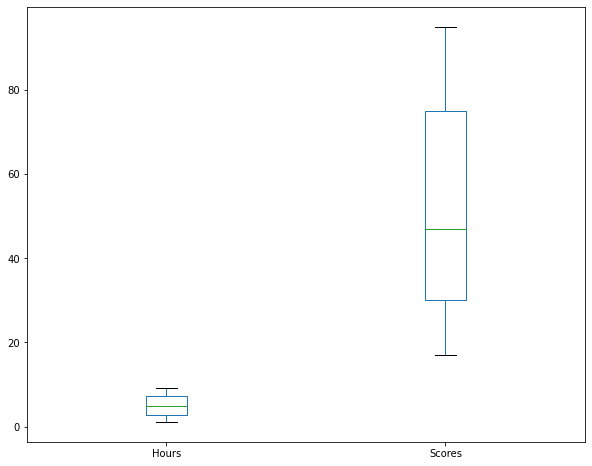

In [6]:
# Check for Outliers by box plot
plt.rcParams["figure.figsize"] = (10,8)
student.plot(kind='box')
plt.show()

Data contains no ouliers.

In [7]:
# We have only one independent variable so ,there is no need to check correlation.

Explore relationship between Hours and Scores using scatterplot.

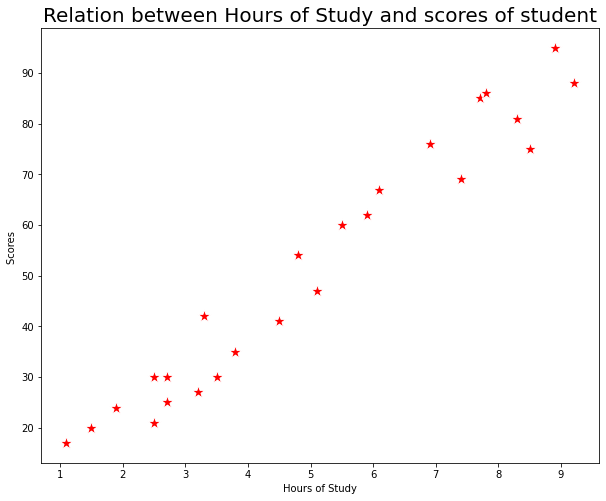

In [8]:
# scatter plot
sns.scatterplot(data=student,x='Hours',y='Scores',marker='*',color='red',s=200)
plt.title('Relation between Hours of Study and scores of student',fontdict={'fontsize': 20})
plt.xlabel('Hours of Study')
plt.ylabel('Scores ')
plt.show()

From scatterplot we can say when hours of study increases then student's score also increases.

#### Preparing the Data

In [9]:
# independent varibale
# scaling is not needed for single variable.
X = student.iloc[:, :-1].values  
# dependent variable
y = student.iloc[:, 1].values  

In [10]:
student['Scores'].dtype

dtype('int64')

The student's score is continue data.

In [11]:
# Splitting dataset into train and test dataset ,so we can make model on training data and test it into testing data.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

#### Model Building
#### Using Linear Regression

In [12]:
linreg = LinearRegression()

In [13]:
linreg_model = linreg.fit(X_train,y_train)

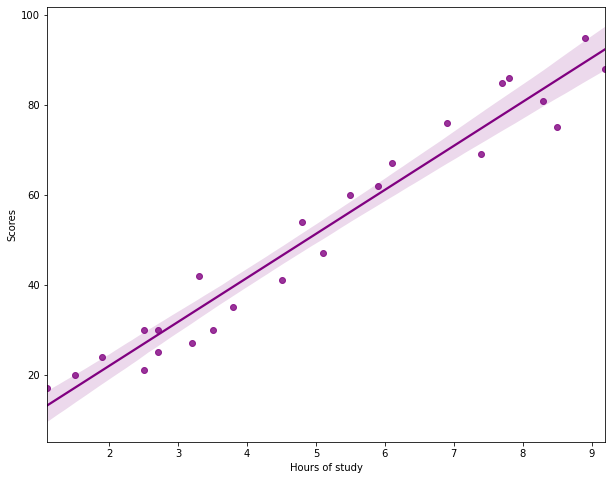

In [14]:
# Regression Line
sns.regplot(X,y,color='purple')
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.show()

From this scatterplot, we can day the error terms are independent or each other.

#### Making Prediction

In [15]:
y_test_pred = linreg_model.predict(X_test)

In [16]:
# Comparing Actual vs Predicted
Prediction = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})  
Prediction 

,Actual,Predicted
0,30,26.231311
1,20,16.331600
2,62,59.890328
3,41,46.030733
4,54,49.000646


Ques. what will be the score if student studies for 9.25 hrs/day ?

In [17]:
# You can also test with your own data
hours = 9.25
hours = np.reshape(hours, (1, -1))
own_pred = linreg.predict(hours)
print("Duration of Hours : {}".format(hours))
print("Predicted Score : {}".format(own_pred[0]))

Duration of Hours : [[9.25]]
Predicted Score : 93.0543591029836


#### Model Evaluation

Model Evaluation helps you to understand the performance of your model and makes it easy to present your model to other people.

In [19]:
# mean squared error
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
rmse 

4.0598694451072355

Lower the Value of RMSE represents approx prediction prediction.